# Task 7.1
- Registration/Referral id : SIRSS2213
- Full name : Yashraj Deepak Bharambe

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head(10)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
data.shape

(30, 2)

In [4]:
data.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [5]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [6]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [9]:
class LinearRegression() :
    
    def __init__(self , learning_rate , iterations) :
        
        self.learning_rate = learning_rate
        
        self.iterations = iterations
        
    def fit(self , X , Y) :
        
        self.m, self.n = X.shape
        
        self.W = np.zeros(self.n)
        
        self.b = 0
        
        self.X = X
        
        self.Y = Y
        
        
        # gradient descent learning

        for i in range(self.iterations) :
    
            self.update_weights()
    
        return self
    
    def update_weights(self) :
        
        Y_pred = self.predict(self.X)
        
        # calculate gradients
        
        dW = -( 2 * (self.X.T).dot(self.Y - Y_pred )) / self.m
        
        db = - 2 * np.sum(self.Y - Y_pred ) / self.m
        
        # update weights
        
        self.W = self.W - self.learning_rate * dW
        
        self.b = self.b - self.learning_rate * db
        
        return self
    def predict(self , X) :
            
            return X.dot(self.W) + self.b

In [10]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size = 1/3, random_state = 0 )

In [11]:
model = LinearRegression( iterations = 1000, learning_rate = 0.01 )
model.fit( X_train, Y_train )

In [12]:
Y_pred = model.predict( X_test )
print( "Predicted values ", np.round( Y_pred[:3], 2 ) ) 
print( "Real values      ", Y_test[:3] )
print( "Trained W        ", round( model.W[0], 2 ) )
print( "Trained b        ", round( model.b, 2 ) )

Predicted values  [ 40594.69 123305.18  65031.88]
Real values       [ 37731. 122391.  57081.]
Trained W         9398.92
Trained b         26496.31


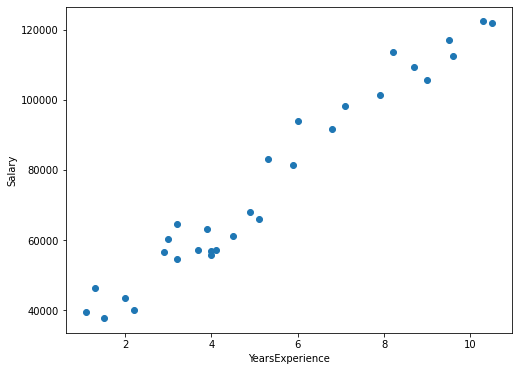

In [13]:
plt.figure(figsize=(8,6))
plt.scatter(X, Y)
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.show()

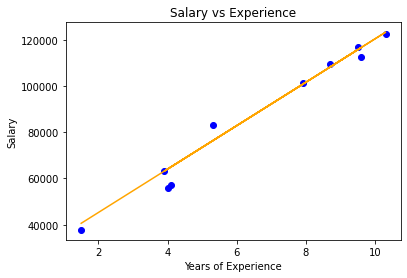

In [14]:
plt.scatter( X_test, Y_test, color = 'blue' )
plt.plot( X_test, Y_pred, color = 'orange' )
plt.title( 'Salary vs Experience' )
plt.xlabel( 'Years of Experience' )
plt.ylabel( 'Salary' )
plt.show()